# Clustering Conclusion [20 points]

In this assignment, you will perform a clustering analysis on [nightclub](https://drive.google.com/file/d/1QySd32bKTjZ1sWpyhTDzdUjdid5-9RdK/view?usp=sharing) customers based on their perceptions of pricing fairness, intent to revisit, and demographic variables. The goal is to identify distinct customer segments that can provide insights into their behavior and preferences.

Nigthclub file: https://drive.google.com/file/d/1QySd32bKTjZ1sWpyhTDzdUjdid5-9RdK/view?usp=sharing


You will use the nightclub dataset, which includes variables such as:

| Variable Name | Description |
| --- | --- |
CustomerType | Are you a frequent customer of this nightclub?
Pricing_Strategy | Type of Variable Pricing Strategy Used for Entrance Fee
Fair1 | How fair is this nightclub's new pricing policy?
Fair2 | How ethical is this nightclub's new pricing policy?
Fair3 | How acceptable is this nightclub's new pricing policy?
WOM_1 | I would spread positive word-of-mouth about this nightclub.
WOM_2 | I would recommend this nightclub to my friends.
WOM_3 | If my friends are looking to go to a nightclub, I would tell them to visit this one.
RI_1 | In the future, I intend to visit this nightclub again.
RI_2 | If I plan to visit a nightclub, I would most likely go to this one.
RI_3 | I would visit this venue again in the future.
FAM1 | How familiar are you with this type of pricing strategy?
FAM2 | How often have you seen, heard, or experienced such a way of pricing?
Nightclub_Frequency | How often do you go to nightclubs?
Gender |
Age |
Ethnicity |
Income |
Employment_status |
Education |



**Data Preprocessing:**

Clean and prepare the data by handling missing values and normalizing the fairness rating and revisit intent variables.
Encode categorical variables like CustomerType, Pricing_Strategy, and Ethnicity appropriately.

**Clustering:**  

Experiment with different types of clustering and different number of clusters to form clusters of customers to inform nightclub management (use in-built libraries for this task). At minimum, you should try two different clustering methods.

**Interpretation:**

Analyze the characteristics of each customer segment. What are the key traits that differentiate these clusters?
How do the clusters differ in terms of their perceptions of fairness and intent to revisit the nightclub?

**Insights:**

Based on the identified clusters, provide recommendations to the nightclub management. Should they tailor their pricing strategies to different customer segments? How can they improve customer satisfaction?

**Data Preprocessing**

In [9]:
import pandas as pd

# loading the dataset
file_path = "/content/Nightclub.csv"
df = pd.read_csv(file_path)

df.head()


,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
0,Frequent customer,Time of a day,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,Once a Week,Male,21.0,caucasian,$50.000 - $79.999,Student,Some college
1,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,Once a Month,Female,35.0,other,under $20.000,Retired,Some college
2,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,Once a Month,Female,26.0,pacific islander,under $20.000,Retired,Some college
3,Frequent customer,Flat pricing,4.0,3.0,2.0,3.0,3.0,1.0,5.0,3.0,5.0,3.0,3.0,2-3 Times a Month,Male,27.0,hispanic,$50.000 - $79.999,Full time employed,Bachelor’s degree
4,First time customer,Flat pricing,5.0,6.0,5.0,1.0,2.0,1.0,2.0,3.0,4.0,5.0,5.0,Less than Once a Month,Male,54.0,caucasian,under $20.000,Student,Some college


In [12]:
# handling missing values
for col in ["Fair1", "Fair2", "Fair3", "RI_1", "RI_2", "RI_3", "WOM_1", "WOM_2", "WOM_3", "FAM1", "FAM2", "Age"]:
    df[col] = df[col].fillna(df[col].median())

for col in ["CustomerType", "Pricing_Strategy", "Ethnicity", "Income", "Education", "Employment_status", "Nightclub_Frequency", "Gender"]:
    df[col] = df[col].fillna(df[col].mode()[0])

# displaying cleaned dataset
df.head()


,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
0,Frequent customer,Time of a day,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,2.0,Once a Week,Male,21.0,caucasian,$50.000 - $79.999,Student,Some college
1,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,Once a Month,Female,35.0,other,under $20.000,Retired,Some college
2,Frequent customer,VIP entrance,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,3.0,Once a Month,Female,26.0,pacific islander,under $20.000,Retired,Some college
3,Frequent customer,Flat pricing,4.0,3.0,2.0,3.0,3.0,1.0,5.0,3.0,5.0,3.0,3.0,2-3 Times a Month,Male,27.0,hispanic,$50.000 - $79.999,Full time employed,Bachelor’s degree
4,First time customer,Flat pricing,5.0,6.0,5.0,1.0,2.0,1.0,2.0,3.0,4.0,5.0,5.0,Less than Once a Month,Male,54.0,caucasian,under $20.000,Student,Some college


In [13]:
# normalizing fairness ratings and revisit intent variables using Min-Max scaling
for col in ["Fair1", "Fair2", "Fair3", "RI_1", "RI_2", "RI_3"]:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)

# encoding categorical variables using label encoding (convert to category codes)
categorical_cols = ["CustomerType", "Pricing_Strategy", "Ethnicity",
                    "Income", "Education", "Employment_status",
                    "Nightclub_Frequency", "Gender"]

for col in categorical_cols:
    df[col] = df[col].astype("category").cat.codes

# displaying dataset after normalization and encoding
df.head()


,CustomerType,Pricing_Strategy,Fair1,Fair2,Fair3,WOM_1,WOM_2,WOM_3,RI_1,RI_2,RI_3,FAM1,FAM2,Nightclub_Frequency,Gender,Age,Ethnicity,Income,Employment_status,Education
0,1,3,0.166667,0.166667,0.166667,1.0,1.0,1.0,0.166667,0.333333,0.000000,2.0,2.0,5,1,21.0,2,2,3,4
1,1,4,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,4.0,3.0,4,0,35.0,5,4,2,4
2,1,4,0.000000,0.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,4.0,3.0,4,0,26.0,6,4,2,4
3,1,1,0.500000,0.333333,0.166667,3.0,3.0,1.0,0.666667,0.333333,0.666667,3.0,3.0,0,1,27.0,3,2,0,0
4,0,1,0.666667,0.833333,0.666667,1.0,2.0,1.0,0.166667,0.333333,0.500000,5.0,5.0,3,1,54.0,2,4,3,4


**Clustering**

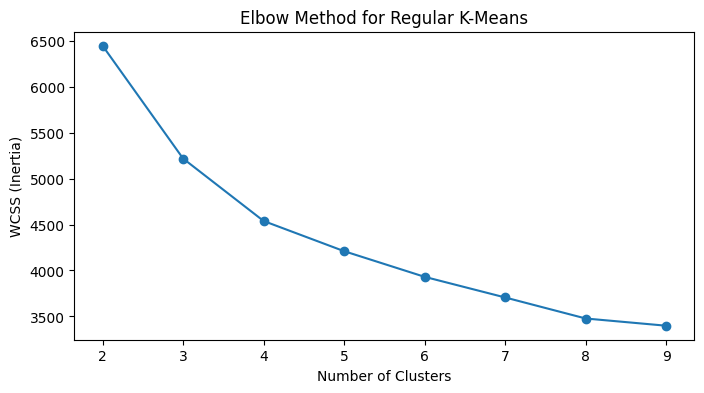

K-Means Cluster Assignments:
KMeans_Cluster
2                 142
0                  66
1                  42
Name: count, dtype: int64


In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Clustering Method #1: K-Means Clustering

# finding the optimal number of clusters using the Elbow Method
wcss = []
cluster_range = range(2, 10)  # testing K from 2 to 9

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init="random", random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# plotting the elbow method
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Regular K-Means")
plt.show()

# running K-Means with the optimal number of clusters (I chose k=3 based on the elbow method plot)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, init="random", random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df)

# displaying K-Means cluster assignments
print("K-Means Cluster Assignments:")
print(df[["KMeans_Cluster"]].value_counts())


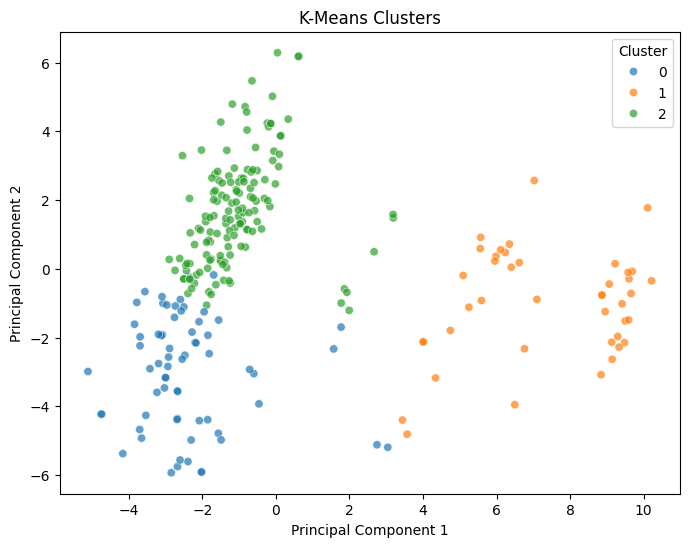

In [32]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# appling PCA to reduce the dataset to 2 dimensions
pca = PCA(n_components=2)
pca_features = pca.fit_transform(df.drop(columns=["KMeans_Cluster"]))  # dropping the cluster column before PCA

# creating a new dataframe with the principal components
df_pca = pd.DataFrame(pca_features, columns=["PC1", "PC2"])
df_pca["KMeans_Cluster"] = df["KMeans_Cluster"]

# scatterplot of PCA components with K-Means clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df_pca["KMeans_Cluster"], palette="tab10", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clusters")
plt.legend(title="Cluster")
plt.show()


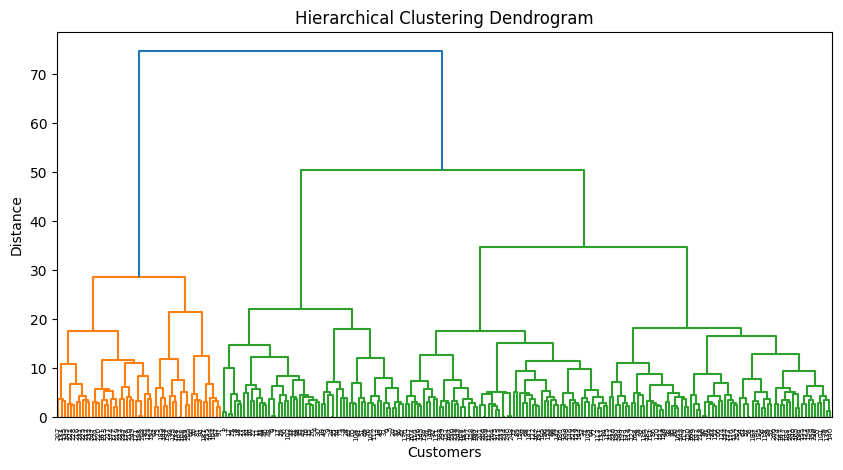

Hierarchical Cluster Assignments:
Hierarchical_Cluster
0                       138
2                        59
1                        53
Name: count, dtype: int64


In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Clustering Method #2: Hierarchical Clustering (Agglomerative Clustering)
# plotting the hierarchical clustering dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(df, method="ward")  # using Ward's method to minimize the variance
dendrogram(linkage_matrix)
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

# running agglomerative Clustering with k=3 (same as K-Means above)
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
df["Hierarchical_Cluster"] = hierarchical.fit_predict(df)

# displaying hierarchical cluster assignments
print("Hierarchical Cluster Assignments:")
print(df[["Hierarchical_Cluster"]].value_counts())


In [63]:
# computing K-Means cluster summary
kmeans_summary = df.groupby("KMeans_Cluster").mean()

# computing Hierarchical cluster summary
hierarchical_summary = df.groupby("Hierarchical_Cluster").mean()

# expanding the display to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("K-Means Cluster Summary:\n", kmeans_summary)
print("\nHierarchical Cluster Summary:\n", hierarchical_summary)

K-Means Cluster Summary:
                 CustomerType  Pricing_Strategy     Fair1     Fair2     Fair3     WOM_1     WOM_2     WOM_3      RI_1      RI_2      RI_3      FAM1      FAM2  Nightclub_Frequency    Gender       Age  Ethnicity    Income  Employment_status  Education  Hierarchical_Cluster
KMeans_Cluster                                                                                                                                                                                                                                                                
0                   0.575758          2.272727  0.388889  0.383838  0.386364  2.712121  2.878788  2.651515  0.325758  0.297980  0.338384  3.196970  2.909091             2.666667  0.378788  0.314471   2.106061  0.496212           1.454545   2.772727              1.848485
1                   0.380952          2.095238  0.801587  0.785714  0.821429  5.595238  5.738095  5.738095  0.781746  0.722222  0.773810  4.738095  3.904762     

**Interpretation**

Based on the results from the chart above, we can see that for cluster 0, the customer type is frequent but price-sensitive, with a moderate level of pricing strategy familiarity. This group finds the nightclub pricing the least fair in K-means, but not the absolute lowest in Hierarchical Clustering. This group is also less likely to revisit or recommend the club, and has slightly more females in K-means Cluster 0 (in Hierarchical clustering, the genders are more balanced in cluster 0). For both methods, Cluster 0 group has mid-level income and moderate visit frequency, but is at risk of disengaging due to lower levels of perceived fairness regarding the pricing strategy. For both methods, the proportion of first-time customers to frequent customers was relatively balanced.

Cluster 1 has the most loyal and engaged customers, with the highest levels of perceived fairness regarding the pricing strategy, and the highest levels of intent to revisit the nightclub. This group is also most likely to recommend the nightclub since they have the highest 'WOM' ratings, and visit the most frequently. This group also has a more balanced gender ratio for both K-means and Hierarchical clustering, and their age group is in the middle for both clustering methods. They have a slightly lower income level Cluster 0, but are still more engaged. In both clustering methods, this group had a higher proportion of first time customers to frequent customers.

Lastly, Cluster 2 characteristics differ slightly between Hierarchical clustering and K-means. Overall this has a lower nightclub visit frequency, and even gender distribution in K-means, but slightly more females in Hierarchical clustering. They have the highest level of income, and in K-means they represent the youngest age group, but in Hierarchical clustering they represent the lowest age group. In K-means, they are somewhat likely to recommend and revisit the nightclub, but in Hierarchical clustering they are the least likely to recommend or revisit the nightclub. In Hierarchical clustering, this group had the highest proportion of frequent customers to first time customers, but in K-means, the proportion of first-time and frequent customers was perfectly balanced.



**Insights**

Based on the characteristics for each cluster, we can make the following recommendations to the nightclub management:

For Cluster 0, I would recommend introducing targeted discounts (e.g., off-peak happy hour pricing and student discounts) as well as offering transparent pricing and limited-time promotions to improve the perception of fairness. I would also recommend encouraging engagement by using loyalty perks (e.g., implementing a "Visit 3 times, get a free entry" program).

Cluster 1 was overall the most loyal and satisfied group since the customers in that group had the highest nightclub frequency and highest perceived fairness regarding pricing, as well as a higher likelihood of recommending the nightclub and revisiting the nightclub. Therefore, I would recommend strengthening loyalty with VIP programs (e.g., exclusive events, reserved seating) and offering referral rewards (e.g., bring a friend, get a free drink). The management could also further increase engagement with personalized experiences, such as birthday rewards and premium table upgrades.


For Cluster 2, the customers in this group had a higher income but lower visit frequency, so I would recommend offering premium experiences such as VIP bottle service and priority access, as well as creating exclusive, high-end events like rooftop parties and celebrity guest appearances. I would also recommend using targeted marketing to improve engagement, such as spending on social media ads for upscale events.


# KNN, Logistic Regression, Naive Bayes

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [67]:
import seaborn as sns

In [68]:
from typing import Tuple

The goal of this assignment is to deepen your understanding of three fundamental classification algorithms: K-Nearest Neighbors (KNN), Logistic Regression, and Naive Bayes. You will implement the algorithms from scratch (i.e., without using machine learning libraries like scikit-learn) and apply them to a real-life dataset.

**Dataset Description**

You will use the Pima Indians Diabetes Dataset, which is available from Kaggle. This dataset consists of medical diagnostic measurements to predict whether a patient has diabetes.

Number of Instances: 768.
Number of Attributes: 8 predictive features and 1 target variable.
Predictive Features:  

* Number of times pregnant  
* Plasma glucose concentration  
* Diastolic blood pressure (mm Hg)  
* Triceps skinfold thickness (mm)  
* 2-Hour serum insulin (mu U/ml)  
* Body mass index (weight in kg/(height in m)^2)  
* Diabetes pedigree function  
* Age (Categorical)

Target Variable:  
0: Non-diabetic  
1: Diabetic.

In [69]:
# Defining the helper function to evaluate your model

def evaluate_model(true_labels, predicted_labels):
    """Evaluates the model using various metrics.

    Args:
        true_labels (numpy.ndarray): The true class labels.
        predicted_labels (numpy.ndarray): The predicted class labels.

    Returns:
        dict: A dictionary containing evaluation metrics.
    """
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

    cm = confusion_matrix(true_labels, predicted_labels)
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    metrics = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    return metrics

## Data Loading and Preprocessing (5 points)  

Load the Dataset: Read the dataset into your program.  
Data Cleaning: Check for missing values or anomalies and handle them appropriately.  
Feature Scaling: Apply feature scaling (normalization or standardization) to the dataset.  
Train-Test Split: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).  


In [71]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [98]:
# defining columns where zero likely represents missing values
cols_with_missing_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# replacing zeros with nan
diabetes[cols_with_missing_zeros] = diabetes[cols_with_missing_zeros].replace(0, np.nan)

# imputing missing values with the median
diabetes[cols_with_missing_zeros] = diabetes[cols_with_missing_zeros].apply(lambda col: col.fillna(col.median()))

# handling outliers using the IQR method
Q1 = diabetes.quantile(0.25)  # first quartile (25%)
Q3 = diabetes.quantile(0.75)  # third quartile (75%)
IQR = Q3 - Q1  # interquartile range

# defining lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# filtering out outliers (keeping only rows where all feature values are within bounds)
diabetes_cleaned = diabetes[~((diabetes < lower_bound) | (diabetes > upper_bound)).any(axis=1)]

# storing feature names
feature_names = diabetes.drop(columns=['Outcome']).columns.tolist()

# feature scaling (manual standardization)

X = diabetes_cleaned.drop(columns=['Outcome'])
y = diabetes_cleaned['Outcome']

# defining categorical and numerical features
cat_features = ['Age']  # Define categorical features manually
num_features = [f for f in feature_names if f not in cat_features]  # Get numerical features

# applying feature scaling (Z-score normalization) - KEEP AS PANDAS DATAFRAME
X[num_features] = (X[num_features] - X[num_features].mean()) / X[num_features].std()

# creating train-test split while keeping DataFrame format
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# resetting the index
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Implement K-Nearest Neighbors (KNN) from Scratch (20 points)

Our implementation will be an improvement of the existing KNN classifier in scikit learn. KNN is scikit-learn can only handle numeric variables, but we will build one that can handle both categorical and numeric variables.


**Distance Function**


Our distance function must handle both numerical and categorical variables.Recall, from K-Prototypes algorithm, we implemented such a function. Let's do it again.

Implement code to handle the numerical features

In [99]:
def euclidean_distance(x: np.array, y: np.array) -> float:
    """Calculates the Euclidean distance between two points.
    [2 points]
    Args:
        x (numpy.ndarray): The first point.
        y (numpy.ndarray): The second point.

    Returns:
        float: The Euclidean distance between the two points.
    """
    return np.sqrt(np.sum((x - y) ** 2))

Implement code to handle the categorical features

In [100]:
def simple_matching_dissimilarity(x: np.array, y: np.array) -> float:
    """Calculates the simple matching dissimilarity between two categorical samples.
    [2 points]
    Args:
        x (numpy.ndarray): the categorical features of the first sample.
        y (numpy.ndarray): the categorical features of the second sample.

    Returns:
        int: The number of mismatches between the two points.
    """
    return  np.sum(x != y)

### Neighbor Identification

Define a function that finds the k-nearest neighbor's labels.

In [101]:
def get_k_nearest_neighbors(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    test_instance: pd.DataFrame,
    k: int,
    num_features: list,
    cat_features: list,
    gamma: float,
) -> list:
    """Finds the k nearest neighbors of a test instance.
    [8 points]
    Args:
        X_train (pd.DataFrame): The training data.
        y_train (pd.DataFrame): The labels for the training data.
        test_instance (pd.DataFrame): The test instance.
        k (int): The number of neighbors to find.
        num_features (list): List containing numerical column names
        cat_features (list): List containing categorical column names
        gamma (float): The weight to put on categorical distance

    Returns:
        list: Labels of the k nearest neighbors.
    """

    # make sure to handle cases where the data only has numeric or categorical
    # variables.

    # Your total distance must be a sum of the euclidean distance + gamma * categorical distance

    distances = []  # List to store distances and labels

    test_num = test_instance[num_features].values.flatten()  # extracting numeric values
    test_cat = test_instance[cat_features].values.flatten()  # extracting categorical values

    for i in range(len(X_train)):
        train_num = X_train.iloc[i][num_features].values
        train_cat = X_train.iloc[i][cat_features].values

        # computing Euclidean distance for numerical features
        num_distance = np.sqrt(np.sum((train_num - test_num) ** 2))

        # computing simple matching dissimilarity for categorical features
        cat_distance = np.sum(train_cat != test_cat)

        # total distance with gamma weighting for categorical distance
        total_distance = num_distance + (gamma * cat_distance)

        # append (distance, label) pair
        distances.append((total_distance, y_train.iloc[i]))

    # sort distances in ascending order
    distances.sort(key=lambda x: x[0])

    # extract labels of k nearest neighbors
    k_nearest_labels = [label for _, label in distances[:k]]

    return k_nearest_labels

### Prediction Function

In [102]:
def predict_classification(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    test_instance: pd.DataFrame,
    k: int,
    num_features: list,
    cat_features: list,
    gamma: float,
) -> str:
    """Predicts the class label for a test instance by first calling get_k_nearest_neighbors
    and then taking a majority vote
    [4 points]
    Args:
        X_train (pd.DataFrame): The training data.
        y_train (pd.DataFrame): The labels for the training data.
        test_instance (pd.DataFrame): The test instance.
        k (int): The number of neighbors to find.
        num_features (list): List containing numerical column names
        cat_features (list): List containing categorical column names
        gamma (float): How much to weigh the categorical distances

    Returns:
        The predicted class label.
    """

    # fill code here

    # getting k-nearest neighbors' labels
    k_nearest_labels = get_k_nearest_neighbors(X_train, y_train, test_instance, k, num_features, cat_features, gamma)

    # counting the occurrences of each label
    label_counts = {}  # dictionary to store label frequencies

    for label in k_nearest_labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

    # finding the label with the highest count (manual majority voting)
    most_common_label = max(label_counts, key=label_counts.get)
    return most_common_label


### KNN Classifier Function

In [103]:
def knn_classifier(
    X_train: pd.DataFrame,
    y_train: pd.DataFrame,
    X_test: pd.DataFrame,
    k,
    num_features: list,
    cat_features: list,
    gamma: float,
) -> list:
    """Classifies test data using the KNN algorithm. Iterates over all rows in
    X_test and returns the prediction for each of them
    [4 points]
    Args:
        X_train (pd.DataFrame): The training data.
        y_train (pd.DataFrame): The labels for the training data.
        X_test (pd.DataFrame): The test data to classify.
        k (int): The number of neighbors to consider.
        num_features (list): List containing numerical column names
        cat_features (list): List containing categorical column names
        gamma (float): How much to weigh the categorical distances.


    Returns:
        list: Predicted class labels for the test data.
    """

    predictions = []  # initializing an empty list to store predictions

    for i in range(len(X_test)):
        test_instance = X_test.iloc[[i]]

        # making sure test_instance has the same columns as X_train
        test_instance = test_instance.reindex(columns=X_train.columns, fill_value=0)

        predicted_label = predict_classification(
            X_train, y_train, test_instance, k, num_features, cat_features, gamma
        )

        predictions.append(predicted_label)

    return predictions

In [105]:
k = 5  # You can choose any value of k
cat_features = ["Age"]
num_features = feature_names.copy()
num_features.remove("Age")

# play around with different values of gamma
gamma = 0.5
predicted_labels = knn_classifier(
    X_train, y_train, X_test, k, num_features, cat_features, gamma
)
metrics = evaluate_model(y_test, predicted_labels)

# Display the evaluation metrics
for key, value in metrics.items():
    print(f"{key}:")
    print(value)
    print()


Confusion Matrix:
[[62 15]
 [16 31]]

Accuracy:
0.75

Precision:
0.6739130434782609

Recall:
0.6595744680851063

F1 Score:
0.6666666666666666



**Bonus** [5 points]


My naive simple application of the algorithm on this dataset gave me a F1-Score of 0.593. Can you improve this score? If you get a F1-Score about 0.6, you will get an extra 5 points.

You are allowed to do any feature engineering you want, or any changes to the KNN algorithm. You are not allowed to use a different machine learning algorithm.


I was able to get an F1 Score of 0.666 by making a few changes in the data preprocessing step. First, I removed outliers, which can negatively impact distance-based algorithms like KNN, using the interquartile range (IQR) method to detect and remove extreme values. I also used feature scaling by applying z-score normalization to standardize numerical features.

## Implementing Logistic Regression [25 points]

You will implement a logistic regression classifier using gradient descent. You can use Numpy. You will need to implement the following functions:

* Sigmoid function
* Function to compute the cost (loss) function
* Function for gradient descent optimization
* Function to make predictions
* A fit function that trains the logistic regression model

In [130]:
#  Sigmoid function [3 points]
def sigmoid(z: np.ndarray) -> np.ndarray:
    """Computes the sigmoid function.

    Args:
      z: np.ndarray, the input array.

    Returns:
      np.ndarray: The sigmoid of the input.
    """
    #fill code here
    return 1 / (1 + np.exp(-z))

**Implement the log-loss function**


Recall that the log-loss function is:

$$
Log-loss (J) = - \frac{1}{n} \sum_{i=1}^n [y_i ln(p_i) + (1-y_i) ln (1-p_i)]
$$
where `ln` is the natural log, and:  

$$
p_i  = \frac{1}{1 + e^{-w^TX_i}}
$$

for all $i$ from 1 to $n$, if you have $n$ training samples.

In [139]:
# Loss function [5 points]
def compute_cost(X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
    """Computes the cost (loss) for logistic regression.

    Args:
      X: np.ndarray, the input feature matrix.
      y: np.ndarray, the true labels.
      w: np.ndarray, the logistic regression coefficients.

    Returns:
      float: The computed cost.
    """
    n = len(y)
    # fill code here

    z = np.dot(X, w)

    p = sigmoid(X @ w)  # Ensure p is (n_samples,1)
    cost = -(1 / n) * np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))
    return cost

**Implement Gradient Descent**

Now we need to code gradient descent for us to be able to find $w$ that minimizes our loss function. Recall, that the partial derivative of the log-loss function wrt $w$ is:

$$
\frac{\partial J}{\partial w} = \frac{1}{n} X^T(p_i - y)
$$

In [140]:
# Gradient descent [6 points]
def gradient_descent(X: np.ndarray, y: np.ndarray, w: np.ndarray, eta: float, num_iters: int) -> Tuple[np.ndarray, np.ndarray]:
    """Performs gradient descent to optimize logistic regression. Note that the
    loop runs until n_iter, but you can also check for convergence and break
    out of the loop earlier.

    Args:
      X: np.ndarray, the input feature matrix.
      y: np.ndarray, the true labels.
      w: np.ndarray, the logistic regression coefficients.
      eta: float, the learning rate.
      num_iters: int, number of iterations.

    Returns:
      Tuple[np.ndarray, np.ndarray]: The optimized theta and the cost history.
    """
    n = len(y)
    cost_history = np.zeros(num_iters)
    # fill code here

    for i in range(num_iters):
        p = sigmoid(X @ w)
        gradient = (1 / n) * (X.T @ (p - y))

        # update the gradient
        w -= eta * gradient

        # storing cost to check for convergence
        cost_history[i] = compute_cost(X, y, w)

    return w, cost_history

Lets write the prediction function.

In [148]:
# Predict function [4 points]
def predict(X: np.ndarray, w: np.ndarray) -> np.ndarray:
    """Predicts binary labels for input data using logistic regression.

    Args:
      X: np.ndarray, the input feature matrix.
      w: np.ndarray, the logistic regression coefficients.

    Returns:
      np.ndarray: Predicted labels (0 or 1).
    """
    # fill code here
    X_and_bias = np.hstack((np.ones((X.shape[0], 1)), X))
    probability = sigmoid(X_and_bias @ w)
    predictions = (probability >= 0.5).astype(int)
    return predictions


Lets write the `fit` function

In [149]:
# Train function [3 points]
def fit(
    X: np.ndarray, y: np.ndarray, eta: float = 0.01, num_iters: int = 1000
) -> Tuple[np.ndarray, np.ndarray]:
    """Trains the logistic regression model.

    Args:
      X: np.ndarray, the input feature matrix.
      y: np.ndarray, the true labels.
      eta: float, the learning rate.
      num_iters: int, number of iterations.

    Returns:
      Tuple[np.ndarray, np.ndarray]: The optimized w and cost history.
    """
    X = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term (w0)
    # fill code here to optimize w

    w = np.zeros(X.shape[1])  # initialize weights to zero
    w, cost_history = gradient_descent(X, y, w, eta, num_iters)
    return w, cost_history

### Applying Logistic Regression

[4 points]

Use the above defined Logistic regression functions to predict `Outcome` in the diabetes dataset.

Remember that logistic regression does not allow categorical variables, so you need to create dummy variables for `age_new`.

Make sure to evaluate your model on data it was not trained on. Report the evaluation metrics.

Plot the cost function.

In [159]:
from sklearn.preprocessing import StandardScaler

# identifying all numerical columns (excluding target variable)
# NOTE: I am not creating a dummy variable for Age because it is a numerical variable in this dataset. I have double checked to make sure I downloaded the correct dataset from Kaggle, and the Age column in the Pima Indians Diabetes is definitely numeric, not categorical.
numerical_cols = X_train.columns

# scaling data to improve the performance of gradient descent
# initialize scaler
scaler = StandardScaler()

# fit on training data and transform both training and test sets
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [160]:
# Train the logistic regression model
eta = 0.01
num_iters = 1000
# this code block wouldnt work until you correctly specify
# X_train and y_train
w, cost_history = fit(X_train, y_train, eta, num_iters)

In [161]:
preds = predict(X_test, w)

In [166]:
# reporting evaluation metrics
metrics = evaluate_model(y_test, preds)

for key, value in metrics.items():
    print(f"{key}: {value}\n")


Confusion Matrix: [[63 14]
 [21 26]]

Accuracy: 0.717741935483871

Precision: 0.65

Recall: 0.5531914893617021

F1 Score: 0.5977011494252874



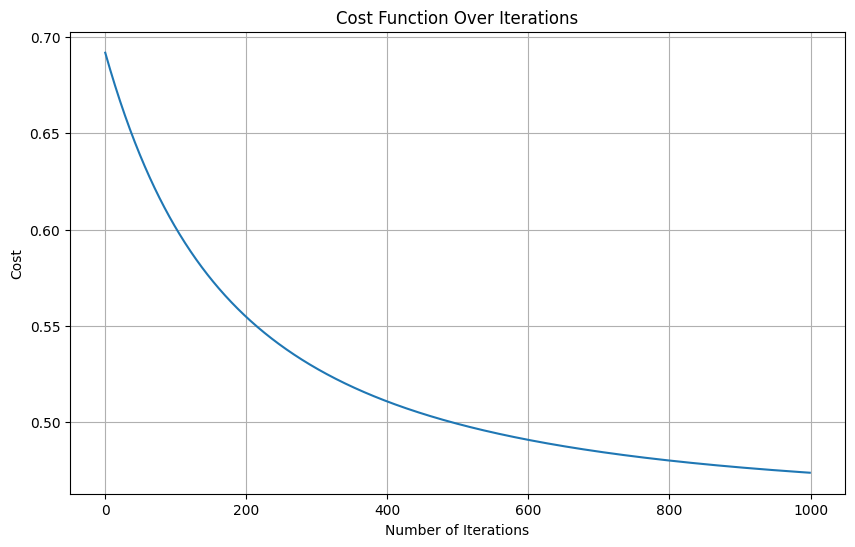

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.grid(True)
plt.title("Cost Function Over Iterations")
plt.show()


# Linearity of Gaussian naive Bayes [10 points]
In this question, you will show that naive Bayes is a linear classifier when using Gaussian variables with shared variances. Specifically, consider the following naive Bayes model:
    
    
$$
p\left(y|x\right) = \frac{\prod^{d}_{j=1}p\left(x_{j}|y\right)p\left(y\right)}{p\left(x\right)}
$$

with:
$$
p\left(x_{j}|y\right) \sim N\left(\left[\mu_y\right]_{j}, \sigma_{j}\right)
$$

That is, there is a separate mean value for each feature $x_{j}$ and each class $y \in \{0, 1\}$. However, variances are shared across classes, so that there is only one variance $\sigma_{j}$ per feature.

Here $d$ is the number of features

## Part 1 [3 points]

Show that the decision rule $p(y=1|x)$ can equivalently be written as:

$$
p(y=1|x) = \frac{\prod_{j=1}^{d} p(x_{j}|y=1)p(y=1)}{\prod_{j=1}^{d} p(x_{j}|y=1)p(y=1)+\prod_{j=1}^{d} p(x_{j}|y=0)p(y=0)}
$$



**Answer:**

Using Bayes' theorem, we have:

$$
p(y | x) = \frac{p(x | y) p(y)}{p(x)}
$$

where

$$
p(x | y) = \prod_{j=1}^{d} p(x_j | y)
$$

we substitute this into Bayes' rule for $p(y = 1 | x)$:

$$
p(y = 1 | x) = \frac{\prod_{j=1}^{d} p(x_j | y=1) p(y=1)}{\sum_{y' \in \{0,1\}} \prod_{j=1}^{d} p(x_j | y=y') p(y=y')}
$$

which is equivalent to the form above:

$$
p(y=1|x) = \frac{\prod_{j=1}^{d} p(x_{j}|y=1)p(y=1)}{\prod_{j=1}^{d} p(x_{j}|y=1)p(y=1)+\prod_{j=1}^{d} p(x_{j}|y=0)p(y=0)}
$$

## Part 2 [3 points]

Using this formulation, show how to rewrite $p(y=1|x)$ as:

$$
p(y=1|x) = \frac{1}{1+\exp{\left(-\log\frac{\prod_{j=1}^{d} p([x]_{j}|y=1)p(y=1)}{\prod_{j=1}^{d} p([x]_{j}|y=0)p(y=0)}\right)}}
$$


**Answer:**

Using the expression from Part 1, we start with:

$$
p(y = 1 | x) = \frac{\prod_{j=1}^{d} p(x_j | y=1) p(y=1)}{\prod_{j=1}^{d} p(x_j | y=1) p(y=1) + \prod_{j=1}^{d} p(x_j | y=0) p(y=0)}
$$

To rewrite this in the form above, we divide both the numerator and denominator by $\prod_{j=1}^{d} p(x_j | y=1) p(y=1)$:

$$
p(y = 1 | x) = \frac{1}{1 + \frac{\prod_{j=1}^{d} p(x_j | y=0) p(y=0)}{\prod_{j=1}^{d} p(x_j | y=1) p(y=1)}}
$$

Looking at this, we can see that the fraction inside the denominator can be rewritten using the exponential function:

$$
\frac{\prod_{j=1}^{d} p(x_j | y=0) p(y=0)}{\prod_{j=1}^{d} p(x_j | y=1) p(y=1)} = \exp \left( \log \frac{\prod_{j=1}^{d} p(x_j | y=0) p(y=0)}{\prod_{j=1}^{d} p(x_j | y=1) p(y=1)} \right)
$$

Applying this substitution, we have:

$$
p(y = 1 | x) = \frac{1}{1 + \exp \left( - \log \frac{\prod_{j=1}^{d} p(x_j | y=1) p(y=1)}{\prod_{j=1}^{d} p(x_j | y=0) p(y=0)} \right)}
$$

which matches the form given above.


## Part 3 [4 points]

Given the above expression for $p(y=1|x)$, show that naive Bayes with this definition of $p([x]_{j}|y)$ is a linear model.

Hint: the form you derived in part 2 should remind you of a decision rule you have seen before. You would need to expand the exp in the second part, plug in the distribution for the $x$, and then rename terms to make this decision boundary look similar to something you have seen before which is linear.



Remember:
$$
\begin{aligned}
p([x]_{j} \mid y=1)&=\frac{1}{\sqrt{2\pi[\sigma]_{j}}}\exp\left(\frac{-([x]_{j}-[\mu_{1}]_{j})^{2}}{2[\sigma]_{j}}\right) \\
p([x]_{j} \mid y=0)&=\frac{1}{\sqrt{2\pi[\sigma]_{j}}}\exp\left(\frac{-([x]_{j}-[\mu_{0}]_{j})^{2}}{2[\sigma]_{j}}\right)
\end{aligned}
$$

**Answer:**

Taking log ratio from Part 2, we have:

$$
p(y = 1 | x) = \frac{1}{1 + \exp\left( - \log \frac{\prod_{j=1}^{d} p(x_j | y=1) p(y=1)}{\prod_{j=1}^{d} p(x_j | y=0) p(y=0)} \right)}
$$

We know that the decision boundary occurs when:

$$
p(y = 1 | x) = 0.5
$$

which happens when the argument of the exponential is zero, meaning that:

$$
\log \frac{\prod_{j=1}^{d} p(x_j | y=1) p(y=1)}{\prod_{j=1}^{d} p(x_j | y=0) p(y=0)} = 0
$$

Rearranging, we have:

$$
\prod_{j=1}^{d} p(x_j | y=1) p(y=1) = \prod_{j=1}^{d} p(x_j | y=0) p(y=0)
$$

Taking the logarithm on both sides, we have:

$$
\sum_{j=1}^{d} \log p(x_j | y=1) + \log p(y=1) = \sum_{j=1}^{d} \log p(x_j | y=0) + \log p(y=0)
$$

which simplifies to:

$$
\sum_{j=1}^{d} \left( \log p(x_j | y=1) - \log p(x_j | y=0) \right) + \log \frac{p(y=1)}{p(y=0)} = 0
$$

Since we assume that $x_j$ follows a normal distribution:

$$
p(x_j | y=1) = \frac{1}{\sqrt{2\pi} \sigma_j} \exp \left( -\frac{(x_j - \mu_{j1})^2}{2 \sigma_j^2} \right)
$$

$$
p(x_j | y=0) = \frac{1}{\sqrt{2\pi} \sigma_j} \exp \left( -\frac{(x_j - \mu_{j0})^2}{2 \sigma_j^2} \right)
$$

Taking their logarithms:

$$
\log p(x_j | y=1) = -\frac{(x_j - \mu_{j1})^2}{2 \sigma_j^2} - \log \left( \sqrt{2\pi} \sigma_j \right)
$$

$$
\log p(x_j | y=0) = -\frac{(x_j - \mu_{j0})^2}{2 \sigma_j^2} - \log \left( \sqrt{2\pi} \sigma_j \right)
$$

Subtracting:

$$
\log p(x_j | y=1) - \log p(x_j | y=0) = -\frac{(x_j - \mu_{j1})^2}{2 \sigma_j^2} + \frac{(x_j - \mu_{j0})^2}{2 \sigma_j^2}
$$

Expanding the quadratic terms:

$$
(x_j - \mu_{j1})^2 = x_j^2 - 2 x_j \mu_{j1} + \mu_{j1}^2
$$

$$
(x_j - \mu_{j0})^2 = x_j^2 - 2 x_j \mu_{j0} + \mu_{j0}^2
$$

Substituting these into our equation, we have:

$$
\sum_{j=1}^{d} \left[ -\frac{x_j^2 - 2 x_j \mu_{j1} + \mu_{j1}^2}{2 \sigma_j^2} + \frac{x_j^2 - 2 x_j \mu_{j0} + \mu_{j0}^2}{2 \sigma_j^2} \right] + \log \frac{p(y=1)}{p(y=0)} = 0
$$

We can see that the $x_j^2$ terms cancel out:

$$
\sum_{j=1}^{d} \left[ \frac{2 x_j (\mu_{j1} - \mu_{j0}) + \mu_{j0}^2 - \mu_{j1}^2}{2 \sigma_j^2} \right] + \log \frac{p(y=1)}{p(y=0)} = 0
$$

Rearranging:

$$
\sum_{j=1}^{d} \frac{x_j (\mu_{j1} - \mu_{j0})}{\sigma_j^2} + \sum_{j=1}^{d} \frac{\mu_{j0}^2 - \mu_{j1}^2}{2 \sigma_j^2} + \log \frac{p(y=1)}{p(y=0)} = 0
$$

We define:

$$
w_j = \frac{\mu_{j1} - \mu_{j0}}{\sigma_j^2}
$$

$$
w_0 = \sum_{j=1}^{d} \frac{\mu_{j0}^2 - \mu_{j1}^2}{2 \sigma_j^2} + \log \frac{p(y=1)}{p(y=0)}
$$

Now, our equation simplifies to:

$$
\sum_{j=1}^{d} w_j x_j + w_0 = 0
$$

which is a linear decision boundary.

Since the decision boundary is a linear function of $x$, we can conclude that Naive Bayes with normal distributions and shared variances is a linear classifier.

